In [1]:
#baca dataset
from pandas import read_csv
import matplotlib.pyplot as plt

In [7]:
dt = read_csv('C:/Users/sitimariyah/CODING/Deep Learning/deep_learning_with_python/dataset/international-airline-passengers.csv', usecols=[1], 
                  engine='python', skipfooter=3)
dt.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


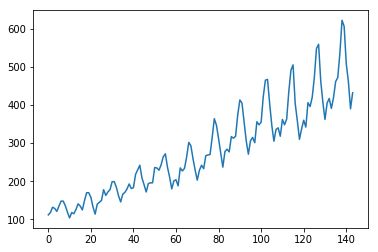

In [8]:
plt.plot(dt)
plt.show()

In [19]:
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.layers import Dense
import numpy
numpy.random.seed(7)

In [9]:
dataset = dt.values
dataset = dataset.astype('float32')

In [10]:
#bagi data menjadi training dan testing
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),: ]
print(len(train))
print(len(test))

96
48


In [15]:
#agar mendapatkan format data ke time t dan data ke time t+1
#maka kita buat dua variabel dalam masing-masing baris
#misal variabel X sbg data time ke t dan Y data ke time+1
#fungsi create_dataset untuk melakukan transformasi data tersebut
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
#membuat model Multi Layer Perceptron(MLP) dan memfitkan ke dataset
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=20, batch_size=2, verbose=2)

Epoch 1/20
 - 0s - loss: 51187.6415
Epoch 2/20
 - 0s - loss: 37250.6613
Epoch 3/20
 - 0s - loss: 26506.2728
Epoch 4/20
 - 0s - loss: 18222.4548
Epoch 5/20
 - 0s - loss: 12033.6793
Epoch 6/20
 - 0s - loss: 7582.2585
Epoch 7/20
 - 0s - loss: 4616.1807
Epoch 8/20
 - 0s - loss: 2741.8674
Epoch 9/20
 - 0s - loss: 1643.7073
Epoch 10/20
 - 0s - loss: 1044.6106
Epoch 11/20
 - 0s - loss: 758.3441
Epoch 12/20
 - 0s - loss: 624.9876
Epoch 13/20
 - 0s - loss: 571.4259
Epoch 14/20
 - 0s - loss: 547.1772
Epoch 15/20
 - 0s - loss: 540.9441
Epoch 16/20
 - 0s - loss: 536.1397
Epoch 17/20
 - 0s - loss: 536.5891
Epoch 18/20
 - 0s - loss: 538.7204
Epoch 19/20
 - 0s - loss: 536.1325
Epoch 20/20
 - 0s - loss: 537.6637


In [23]:
#estimasi performance model
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 534.48 MSE (23.12 RMSE)
Test Score: 2361.50 MSE (48.60 RMSE)


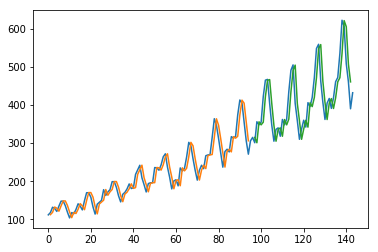

In [25]:
#melakukan prediksi untuk data training dan testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#simpan hasil prediksi training untuk plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#simpan hasil prediksi testing untuk plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]=testPredict

#plot baseline dan hasil prediksi
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Kalau contoh di atas, kita memprediksi data pada time t menggunakan time t-1. Sekarang kita memprediksi menggunakan windows size. Misalkan window size =3 berarti kita memprediksi time t menggunakan data time t-1, t-2, dan t-3. Jadi datanya akan seperti ini jika kita konversi ke X1, X2, X3, dan Y dimana X1 adalah data time t-3, X2 adalah data time t-2, X3 adalah data time t-1, dan Y adalah data time t

In [26]:
# mengubah fungsi create_dataset untuk mentransformasi data
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
#kita reshape dataset ke bentuk yang diinginkan di atas dengan ukuran train dan test yang sama seperti sebelumnya
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [34]:
#membuat model MLP dan memfitkan ke dataset
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 1847.2398
Epoch 2/200
 - 0s - loss: 1232.4251
Epoch 3/200
 - 0s - loss: 1207.5427
Epoch 4/200
 - 0s - loss: 1231.6962
Epoch 5/200
 - 0s - loss: 1226.1312
Epoch 6/200
 - 0s - loss: 1196.2137
Epoch 7/200
 - 0s - loss: 1198.4613
Epoch 8/200
 - 0s - loss: 1196.1387
Epoch 9/200
 - 0s - loss: 1182.2189
Epoch 10/200
 - 0s - loss: 1178.2247
Epoch 11/200
 - 0s - loss: 1171.9291
Epoch 12/200
 - 0s - loss: 1183.8883
Epoch 13/200
 - 0s - loss: 1161.6553
Epoch 14/200
 - 0s - loss: 1153.7786
Epoch 15/200
 - 0s - loss: 1158.1761
Epoch 16/200
 - 0s - loss: 1145.7963
Epoch 17/200
 - 0s - loss: 1156.6230
Epoch 18/200
 - 0s - loss: 1133.7801
Epoch 19/200
 - 0s - loss: 1131.6422
Epoch 20/200
 - 0s - loss: 1131.0608
Epoch 21/200
 - 0s - loss: 1125.2220
Epoch 22/200
 - 0s - loss: 1130.2259
Epoch 23/200
 - 0s - loss: 1132.2580
Epoch 24/200
 - 0s - loss: 1117.6150
Epoch 25/200
 - 0s - loss: 1153.9072
Epoch 26/200
 - 0s - loss: 1119.7840
Epoch 27/200
 - 0s - loss: 1108.7486
Epoch 28/2

In [35]:
#estimasi performance model
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 634.37 MSE (25.19 RMSE)
Test Score: 2913.72 MSE (53.98 RMSE)


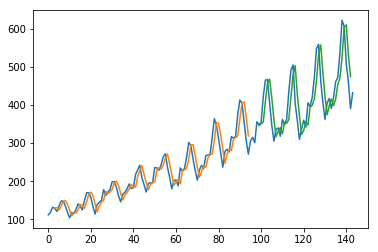

In [36]:
#melakukan prediksi untuk data training dan testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#simpan hasil prediksi training untuk plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#simpan hasil prediksi testing untuk plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :]=testPredict

#plot baseline dan hasil prediksi
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()